In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('C:/Users/01/Desktop/ML/ML proje1 material/training_set.csv')
test = pd.read_csv('C:/Users/01/Desktop/ML/ML proje1 material/testing_set.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
nulls_train= [features for features in train if train[features].isnull().sum()>0]
nulls_train

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [5]:
#missing data handeling

In [6]:
from preprocessor import replacer
replacer(train)

In [7]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [8]:
cat=[]
con=[]
for i in train.columns:
    if train[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)

In [9]:
Y=train[["SalePrice"]]
X=train.drop(labels=["SalePrice"],axis=1)

In [10]:
#checking distribution of target variable

In [11]:
#trying to remove skew of target var

C:\Users\01\AppData\Local\Temp\ipykernel_8940\3269117342.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y)


<Axes: ylabel='Density'>

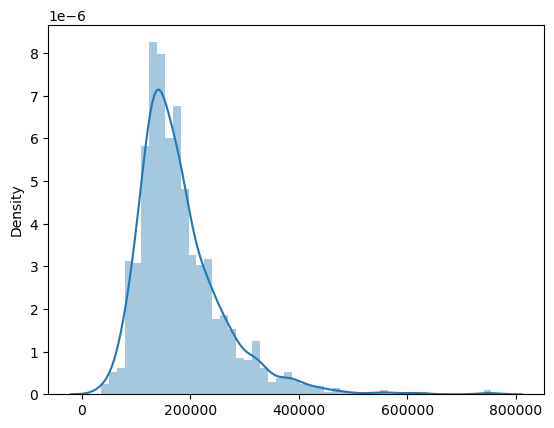

In [12]:
sns.distplot(Y)

now it looks normally distributed

In [13]:
#Drop unnecessary Columns with no statitical importance
#finding highly correlated features

<Axes: >

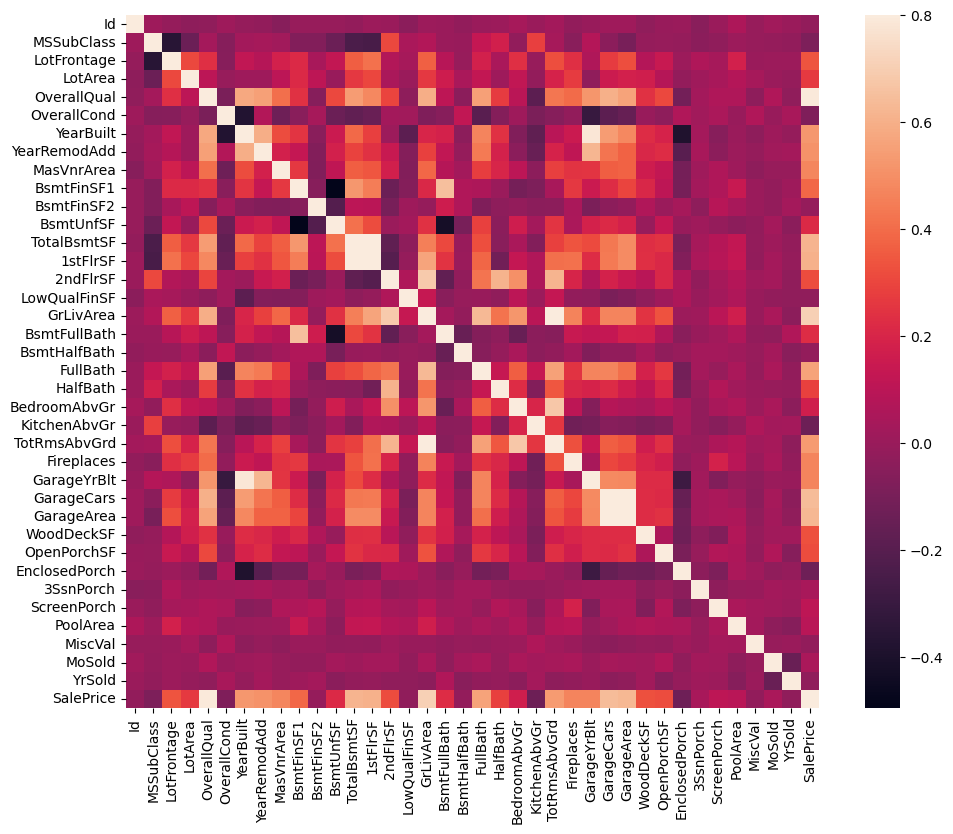

In [14]:
corrmat = train[con].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

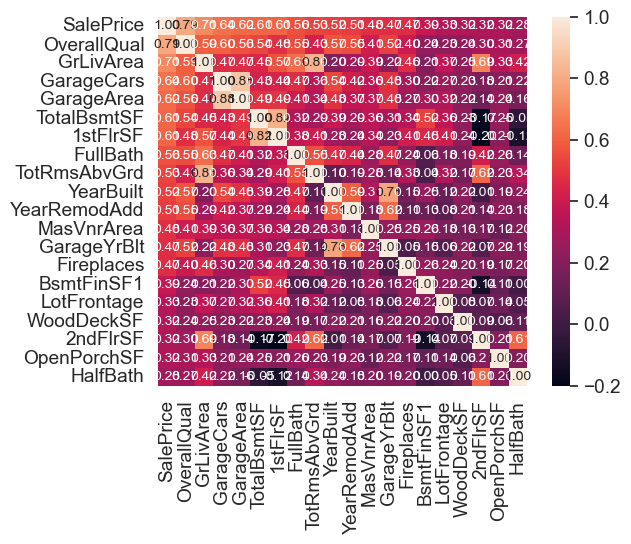

In [15]:
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [16]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


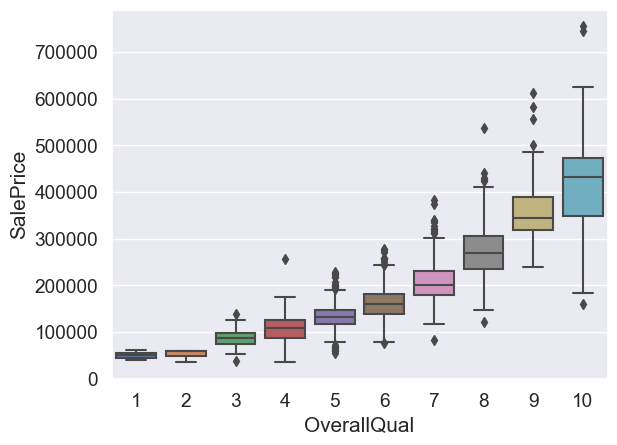

In [17]:
#rel bet overall qu and sales with box plot 
fig = sns.boxplot(x="OverallQual", y="SalePrice", data=train)

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

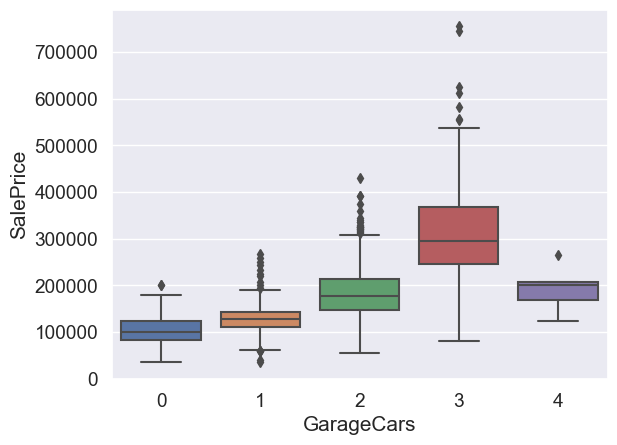

In [18]:
# Garage Area vs Sale Price
sns.boxplot(x=train['GarageCars'], y=train['SalePrice'])

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

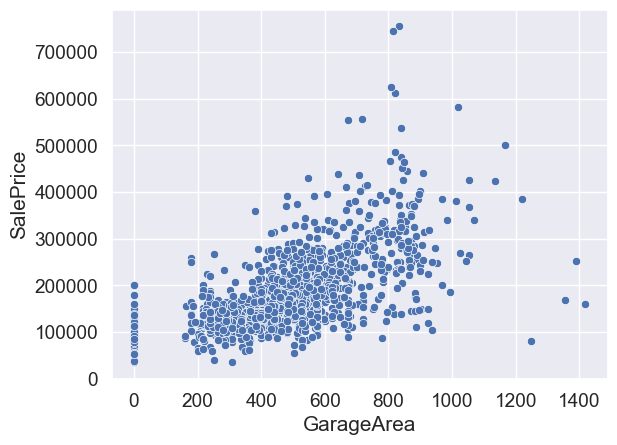

In [19]:
sns.scatterplot(x=train['GarageArea'], y=train['SalePrice'])

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

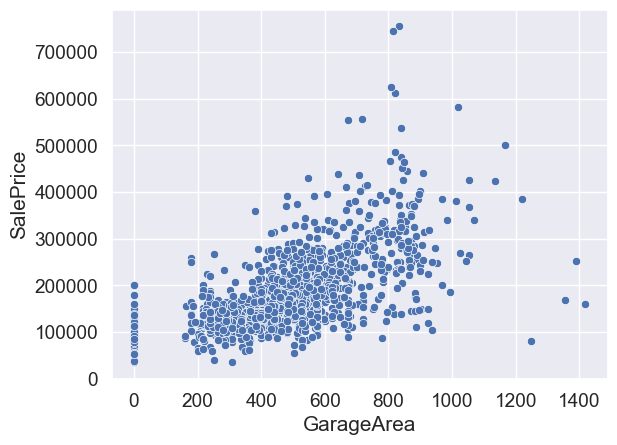

In [20]:
sns.scatterplot(x=train['GarageArea'], y=train['SalePrice'])

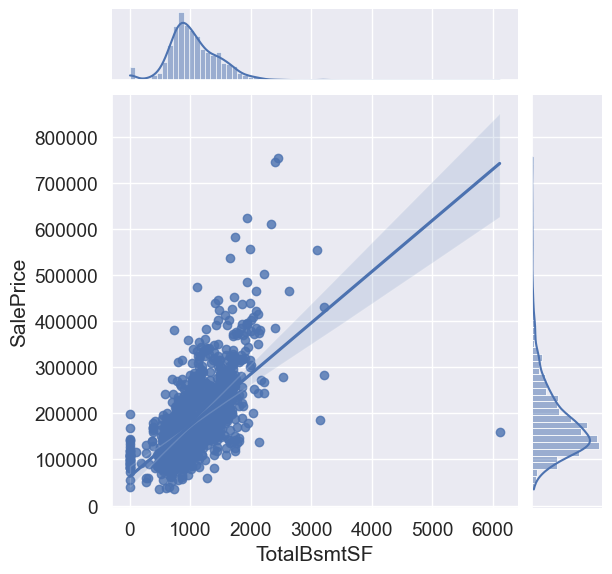

In [21]:
sns.jointplot(x=train['TotalBsmtSF'], y=train['SalePrice'], kind='reg')

<Axes: xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

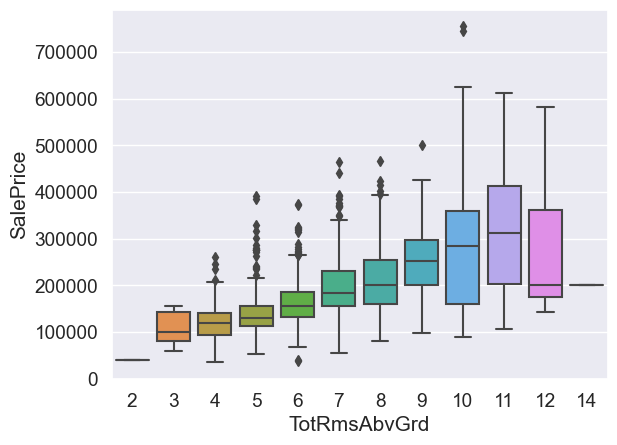

In [22]:
sns.boxplot(x=train['TotRmsAbvGrd'], y=train['SalePrice'])

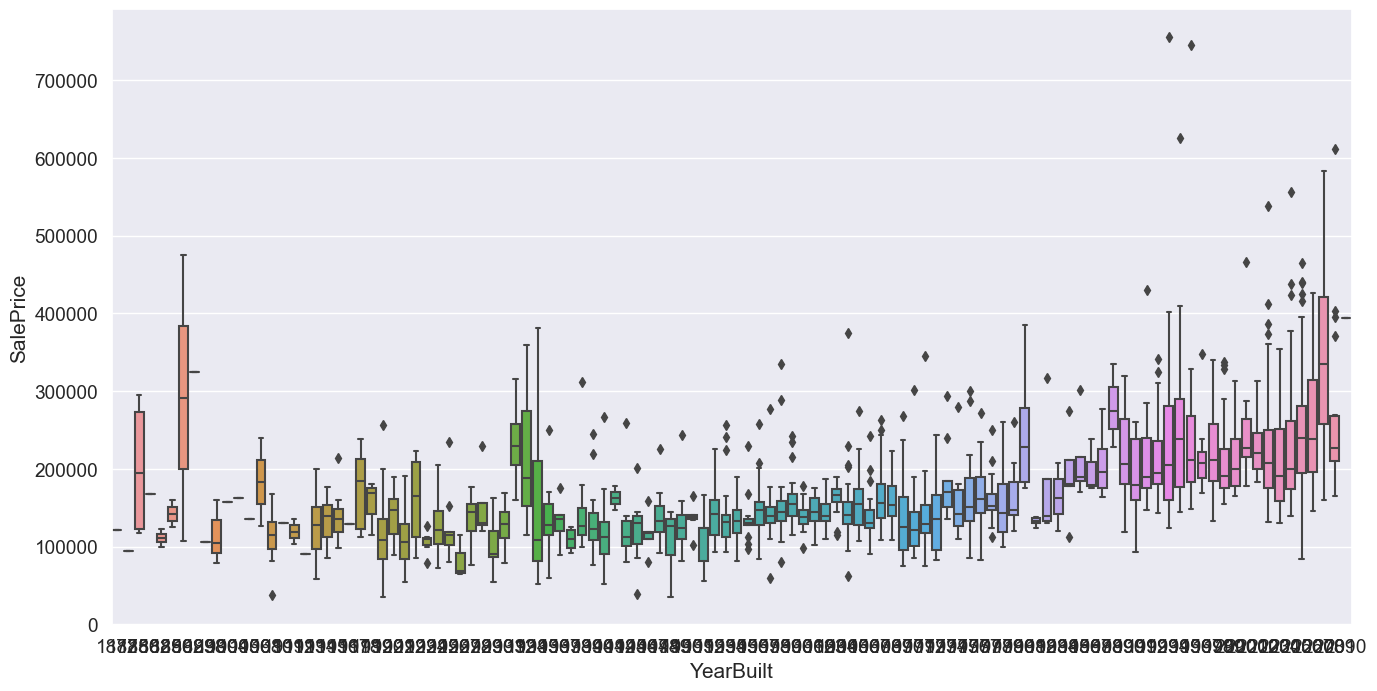

In [23]:
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=train)


In [24]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [25]:
Unwanted_cols=X=train.drop(labels=["Id","MSZoning","LotFrontage","Alley","LandSlope","YearBuilt","YearRemodAdd","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","ScreenPorch","MiscVal","Heating","HeatingQC","1stFlrSF","2ndFlrSF","FullBath","HalfBath","TotRmsAbvGrd","FireplaceQu"],axis=1)

In [26]:
Unwanted_cols

,MSSubClass,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,...,3SsnPorch,PoolArea,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,8450,Pave,Reg,Lvl,AllPub,Inside,CollgCr,Norm,Norm,...,0,0,Gd,MnPrv,Shed,2,2008,WD,Normal,208500
1,20,9600,Pave,Reg,Lvl,AllPub,FR2,Veenker,Feedr,Norm,...,0,0,Gd,MnPrv,Shed,5,2007,WD,Normal,181500
2,60,11250,Pave,IR1,Lvl,AllPub,Inside,CollgCr,Norm,Norm,...,0,0,Gd,MnPrv,Shed,9,2008,WD,Normal,223500
3,70,9550,Pave,IR1,Lvl,AllPub,Corner,Crawfor,Norm,Norm,...,0,0,Gd,MnPrv,Shed,2,2006,WD,Abnorml,140000
4,60,14260,Pave,IR1,Lvl,AllPub,FR2,NoRidge,Norm,Norm,...,0,0,Gd,MnPrv,Shed,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,Pave,Reg,Lvl,AllPub,Inside,Gilbert,Norm,Norm,...,0,0,Gd,MnPrv,Shed,8,2007,WD,Normal,175000
1456,20,13175,Pave,Reg,Lvl,AllPub,Inside,NWAmes,Norm,Norm,...,0,0,Gd,MnPrv,Shed,2,2010,WD,Normal,210000
1457,70,9042,Pave,Reg,Lvl,AllPub,Inside,Crawfor,Norm,Norm,...,0,0,Gd,GdPrv,Shed,5,2010,WD,Normal,266500
1458,20,9717,Pave,Reg,Lvl,AllPub,Inside,NAmes,Norm,Norm,...,0,0,Gd,MnPrv,Shed,4,2010,WD,Normal,142125


In [27]:
#Check for Skew in X columns

In [28]:
numeric_cols=Unwanted_cols.select_dtypes(include=['int','float']).columns
skew=Unwanted_cols[numeric_cols]

In [29]:
skew

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MoSold,YrSold,SalePrice
0,60,8450,7,5,196.0,706,0,150,856,0,...,2,548,0,61,0,0,0,2,2008,208500
1,20,9600,6,8,0.0,978,0,284,1262,0,...,2,460,298,0,0,0,0,5,2007,181500
2,60,11250,7,5,162.0,486,0,434,920,0,...,2,608,0,42,0,0,0,9,2008,223500
3,70,9550,7,5,0.0,216,0,540,756,0,...,3,642,0,35,272,0,0,2,2006,140000
4,60,14260,8,5,350.0,655,0,490,1145,0,...,3,836,192,84,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,0.0,0,0,953,953,0,...,2,460,0,40,0,0,0,8,2007,175000
1456,20,13175,6,6,119.0,790,163,589,1542,0,...,2,500,349,0,0,0,0,2,2010,210000
1457,70,9042,7,9,0.0,275,0,877,1152,0,...,1,252,0,60,0,0,0,5,2010,266500
1458,20,9717,5,6,0.0,49,1029,0,1078,0,...,1,240,366,0,112,0,0,4,2010,142125


In [30]:
skew.skew().sort_values()>0.7


GarageYrBlt      False
GarageCars       False
YrSold           False
GarageArea       False
BedroomAbvGr     False
MoSold           False
OverallQual      False
BsmtFullBath     False
Fireplaces       False
OverallCond      False
BsmtUnfSF         True
GrLivArea         True
MSSubClass        True
TotalBsmtSF       True
WoodDeckSF        True
BsmtFinSF1        True
SalePrice         True
OpenPorchSF       True
MasVnrArea        True
EnclosedPorch     True
BsmtHalfBath      True
BsmtFinSF2        True
KitchenAbvGr      True
LowQualFinSF      True
3SsnPorch         True
LotArea           True
PoolArea          True
dtype: bool

In [31]:
skewed_col=skew.drop(labels=["BsmtUnfSF","GrLivArea","MSSubClass","TotalBsmtSF","BsmtFinSF1","SalePrice","OpenPorchSF","MasVnrArea","BsmtHalfBath","BsmtFinSF2","KitchenAbvGr","LowQualFinSF","3SsnPorch","LotArea","PoolArea"],axis=1)

In [32]:
skewed_col

,OverallQual,OverallCond,BsmtFullBath,BedroomAbvGr,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,EnclosedPorch,MoSold,YrSold
0,7,5,1,3,0,2003.0,2,548,0,0,2,2008
1,6,8,0,3,1,1976.0,2,460,298,0,5,2007
2,7,5,1,3,1,2001.0,2,608,0,0,9,2008
3,7,5,1,3,1,1998.0,3,642,0,272,2,2006
4,8,5,1,4,1,2000.0,3,836,192,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5,0,3,1,1999.0,2,460,0,0,8,2007
1456,6,6,1,3,2,1978.0,2,500,349,0,2,2010
1457,7,9,0,4,2,1941.0,1,252,0,0,5,2010
1458,5,6,1,2,0,1950.0,1,240,366,112,4,2010


In [33]:
#Data Prepration

In [34]:
from preprocessor import data_prep
Xnew=data_prep(X)

In [35]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit_transform(Xnew)

array([[ 0.07337496, -0.20714171,  0.65147924, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.87256276, -0.09188637, -0.07183611, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.07337496,  0.07347998,  0.65147924, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [ 0.30985939, -0.14781027,  0.65147924, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.87256276, -0.08016039, -0.79515147, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.87256276, -0.05811155, -0.79515147, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [36]:
import pandas as pd
pd.DataFrame(ss.fit_transform(Xnew))

,0,1,2,3,4,5,6,7,8,9,...,194,195,196,197,198,199,200,201,202,203
0,0.073375,-0.207142,0.651479,-0.517200,0.511418,0.575425,-0.288653,-0.944591,-0.459303,-0.120242,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.872563,-0.091886,-0.071836,2.179628,-0.574410,1.171992,-0.288653,-0.641228,0.466465,-0.120242,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073375,0.073480,0.651479,-0.517200,0.323060,0.092907,-0.288653,-0.301643,-0.313369,-0.120242,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.309859,-0.096897,0.651479,-0.517200,-0.574410,-0.499274,-0.288653,-0.061670,-0.687324,-0.120242,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.073375,0.375148,1.374795,-0.517200,1.364570,0.463568,-0.288653,-0.174865,0.199680,-0.120242,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.260560,-0.071836,-0.517200,-0.574410,-0.973018,-0.288653,0.873321,-0.238122,-0.120242,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1456,-0.872563,0.266407,-0.071836,0.381743,0.084843,0.759659,0.722112,0.049262,1.104925,-0.120242,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1457,0.309859,-0.147810,0.651479,3.078570,-0.574410,-0.369871,-0.288653,0.701265,0.215641,-0.120242,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1458,-0.872563,-0.080160,-0.795151,0.381743,-0.574410,-0.865548,6.092188,-1.284176,0.046905,-0.120242,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [37]:
pd.get_dummies(X,dtype='int')

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,196.0,706,0,150,856,0,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,0.0,978,0,284,1262,0,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,162.0,486,0,434,920,0,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,0.0,216,0,540,756,0,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,350.0,655,0,490,1145,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,0.0,0,0,953,953,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,13175,6,6,119.0,790,163,589,1542,0,...,0,0,0,1,0,0,0,0,1,0
1457,70,9042,7,9,0.0,275,0,877,1152,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,9717,5,6,0.0,49,1029,0,1078,0,...,0,0,0,1,0,0,0,0,1,0


In [38]:
#Divide data in training & testing set(Random state: 31)0.8,0.2

In [39]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [40]:
#Create a backward elemination OLS model

In [41]:
from statsmodels.api import OLS,add_constant
xconst=add_constant(xtrain)
ol=OLS(ytrain,xconst)
model=ol.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.228e+29
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:23:11   Log-Likelihood:                 23977.
No. Observations:                1168   AIC:                        -4.761e+04
Df Residuals:                     998   BIC:                        -4.675e+04
Df Model:                         169                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   2.13e+04   4.52e-11   4.72e+14      0.000    2.13e+04    2.13e+04
MSSubClass            -4.729e-11   6.51e-11     -0.726      0.468   -1.75e-10    8.05e-11
LotArea                4.547e-11   1.27e-11      3.583      0.000    2.06e-11    7.04e-11
OverallQual            5.343e-11   2.11e-11      2.530      0.012     1.2e-11    9.49e-11
OverallCond            1.864e-11   1.36e-11      1.366      0.172   -8.14e-12    4.54e-11
MasVnrArea             4.911e-11   1.25e-11      3.942      0.000    2.47e-11    7.36e-11
BsmtFinSF1             2.319e-11   1.35e-11      1.719      0.086   -3.28e-12    4.97e-11
BsmtFinSF2            -2.001e-11   1.78e-11     -1.122      0.262    -5.5e-11     1.5e-11
BsmtUnfSF              2.478e-11   1.17e-11      2.125      0.034     1.9e-12    4.77e-11
TotalBsmtSF           -3.683e-11   1.53e-11     -2.400      0.017   -6.69e-11   -6.72e-12
LowQualFinSF           1.091e-11   1.36e-11      0.802      0.423   -1.58e-11    3.76e-11
GrLivArea             -3.456e-11   3.09e-11     -1.119      0.264   -9.52e-11    2.61e-11
BsmtFullBath           4.366e-11   1.55e-11      2.811      0.005    1.32e-11    7.41e-11
BsmtHalfBath          -4.093e-12    1.1e-11     -0.371      0.711   -2.58e-11    1.76e-11
BedroomAbvGr           2.501e-11    1.5e-11      1.666      0.096   -4.45e-12    5.45e-11
KitchenAbvGr           9.095e-13   1.76e-11      0.052      0.959   -3.36e-11    3.54e-11
Fireplaces             5.821e-11   1.32e-11      4.416      0.000    3.23e-11    8.41e-11
GarageYrBlt            3.047e-11   1.94e-11      1.570      0.117    -7.6e-12    6.85e-11
GarageCars            -1.774e-11   2.46e-11     -0.721      0.471    -6.6e-11    3.05e-11
GarageArea            -1.364e-11   2.48e-11     -0.550      0.583   -6.23e-11    3.51e-11
WoodDeckSF            -8.185e-12   1.12e-11     -0.728      0.467   -3.03e-11    1.39e-11
OpenPorchSF            5.912e-12   1.16e-11      0.511      0.610   -1.68e-11    2.86e-11
EnclosedPorch         -3.536e-11   1.13e-11     -3.123      0.002   -5.76e-11   -1.31e-11
3SsnPorch             -1.637e-11    9.3e-12     -1.761      0.079   -3.46e-11    1.87e-12
PoolArea                1.91e-11   1.51e-11      1.269      0.205   -1.04e-11    4.86e-11
MoSold                -2.683e-11   1.02e-11     -2.619      0.009   -4.69e-11   -6.72e-12
YrSold                -1.955e-11   1.05e-11     -1.860      0.063   -4.02e-11    1.07e-12
SalePrice              7.942e+04   3.05e-11   2.61e+15      0.000    7.94e+04    7.94e+04
Street_Grvl            1.065e+04   1.05e-10   1.02e+14      0.000    1.07e+04    1.07e+04
Street_Pave            1.065e+04   9.51e-11   1.12e+14      0.000    1.07e+04    1.07e+04
LotShape_IR1           5325.4001   3.95e-11   1.35e+14      0.000    5325.400    5325.400
LotShape_IR2           

In [42]:
#Remove unncessary columns on the basis of pval

In [43]:
new_D=pd.DataFrame(model.pvalues,columns=["pval"])
column_to_drop=new_D.sort_values(by="pval",ascending=False)[0:1].index[0]
Xnew=Xnew.drop(labels=[column_to_drop],axis=1)

In [44]:
Xnew

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.207142,0.651479,-0.517200,0.511418,0.575425,-0.288653,-0.944591,-0.459303,-0.120242,...,0,0,0,1,0,0,0,0,1,0
1,-0.872563,-0.091886,-0.071836,2.179628,-0.574410,1.171992,-0.288653,-0.641228,0.466465,-0.120242,...,0,0,0,1,0,0,0,0,1,0
2,0.073375,0.073480,0.651479,-0.517200,0.323060,0.092907,-0.288653,-0.301643,-0.313369,-0.120242,...,0,0,0,1,0,0,0,0,1,0
3,0.309859,-0.096897,0.651479,-0.517200,-0.574410,-0.499274,-0.288653,-0.061670,-0.687324,-0.120242,...,0,0,0,1,1,0,0,0,0,0
4,0.073375,0.375148,1.374795,-0.517200,1.364570,0.463568,-0.288653,-0.174865,0.199680,-0.120242,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.260560,-0.071836,-0.517200,-0.574410,-0.973018,-0.288653,0.873321,-0.238122,-0.120242,...,0,0,0,1,0,0,0,0,1,0
1456,-0.872563,0.266407,-0.071836,0.381743,0.084843,0.759659,0.722112,0.049262,1.104925,-0.120242,...,0,0,0,1,0,0,0,0,1,0
1457,0.309859,-0.147810,0.651479,3.078570,-0.574410,-0.369871,-0.288653,0.701265,0.215641,-0.120242,...,0,0,0,1,0,0,0,0,1,0
1458,-0.872563,-0.080160,-0.795151,0.381743,-0.574410,-0.865548,6.092188,-1.284176,0.046905,-0.120242,...,0,0,0,1,0,0,0,0,1,0


In [45]:
#Create a Linear Regression model on the basis of selected columns.

In [46]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(xtrain,ytrain)

In [47]:
pred=model.predict(xtest)

In [48]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,pred)

0.06044391138882381

In [49]:
#overfitting or not

In [50]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(xtrain,ytrain)
from sklearn.metrics import mean_squared_error
pred_tr=model.predict(xtrain)
tr_err=round(mean_squared_error(ytrain,pred_tr),3)
pred_ts=model.predict(xtest)
ts_err=round(mean_squared_error(ytest,pred_ts),3)
print("Training Error:",tr_err)
print("\nTesting Error:",ts_err)
if(tr_err<ts_err):
    print("Overfitting")

Training Error: 0.0

Testing Error: 0.639
Overfitting


In [51]:
#Ridge Lasso

In [52]:
Q=[]
x=20.5
for i in range(0,100,1):
    x=x+0.01
    x=round(x,4)
    Q.append(x)

In [53]:
from sklearn.linear_model import Ridge
for i in Q:
    rr=Ridge(alpha=i)
    model=rr.fit(xtrain,ytrain)
    tr_pred=model.predict(xtrain)
    ts_pred=model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err=mean_absolute_error(ytrain,tr_pred)
    ts_err=mean_absolute_error(ytest,ts_pred)
    print("alpha",i,"\ttr_Err",round(tr_err,4),"\tts_Err",round(ts_err,4))

alpha 20.51 	tr_Err 1906.7712 	ts_Err 2128.9794
alpha 20.52 	tr_Err 1907.4998 	ts_Err 2129.7739
alpha 20.53 	tr_Err 1908.2282 	ts_Err 2130.5682
alpha 20.54 	tr_Err 1908.9564 	ts_Err 2131.3624
alpha 20.55 	tr_Err 1909.6846 	ts_Err 2132.1564
alpha 20.56 	tr_Err 1910.4126 	ts_Err 2132.9503
alpha 20.57 	tr_Err 1911.1405 	ts_Err 2133.744
alpha 20.58 	tr_Err 1911.8682 	ts_Err 2134.5376
alpha 20.59 	tr_Err 1912.5958 	ts_Err 2135.331
alpha 20.6 	tr_Err 1913.3233 	ts_Err 2136.1243
alpha 20.61 	tr_Err 1914.0509 	ts_Err 2136.9174
alpha 20.62 	tr_Err 1914.7794 	ts_Err 2137.7103
alpha 20.63 	tr_Err 1915.5077 	ts_Err 2138.5031
alpha 20.64 	tr_Err 1916.236 	ts_Err 2139.2957
alpha 20.65 	tr_Err 1916.964 	ts_Err 2140.0882
alpha 20.66 	tr_Err 1917.692 	ts_Err 2140.8806
alpha 20.67 	tr_Err 1918.4198 	ts_Err 2141.6727
alpha 20.68 	tr_Err 1919.1475 	ts_Err 2142.4648
alpha 20.69 	tr_Err 1919.8751 	ts_Err 2143.2566
alpha 20.7 	tr_Err 1920.6025 	ts_Err 2144.0484
alpha 20.71 	tr_Err 1921.3298 	ts_Err 2144.8399

In [54]:
Q=[]
x=0.03
for i in range(0,100,1):
    x=x+0.001
    x=round(x,4)
    Q.append(x)

In [55]:
from sklearn.linear_model import Lasso
trerrs=[]
tserrs=[]
for i in Q:
    ls=Lasso(alpha=i)
    model=ls.fit(xtrain,ytrain)
    tr_pred=model.predict(xtrain)
    ts_pred=model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    ts_err = mean_absolute_error(ytest,ts_pred)
    tserrs.append(ts_err)
    tr_err = mean_absolute_error(ytrain,tr_pred)
    trerrs.append(tr_err)
    print("alpha",i,"\ttr_Err",round(tr_err,4),"\tts_Err",round(ts_err,4))

alpha 0.031 	tr_Err 11.2721 	ts_Err 15.494
alpha 0.032 	tr_Err 11.2299 	ts_Err 15.4072
alpha 0.033 	tr_Err 11.1875 	ts_Err 15.323
alpha 0.034 	tr_Err 10.8807 	ts_Err 14.8622
alpha 0.035 	tr_Err 10.8354 	ts_Err 14.7804
alpha 0.036 	tr_Err 10.7911 	ts_Err 14.6999
alpha 0.037 	tr_Err 10.7506 	ts_Err 14.6156
alpha 0.038 	tr_Err 10.711 	ts_Err 14.5316
alpha 0.039 	tr_Err 10.6698 	ts_Err 14.4499
alpha 0.04 	tr_Err 10.6299 	ts_Err 14.3678
alpha 0.041 	tr_Err 10.59 	ts_Err 14.288
alpha 0.042 	tr_Err 10.5517 	ts_Err 14.2115
alpha 0.043 	tr_Err 10.5156 	ts_Err 14.1397
alpha 0.044 	tr_Err 10.4808 	ts_Err 14.0704
alpha 0.045 	tr_Err 10.4445 	ts_Err 14.004
alpha 0.046 	tr_Err 10.4078 	ts_Err 13.9378
alpha 0.047 	tr_Err 10.3689 	ts_Err 13.8706
alpha 0.048 	tr_Err 10.3264 	ts_Err 13.7999
alpha 0.049 	tr_Err 10.2858 	ts_Err 13.7333
alpha 0.05 	tr_Err 10.2482 	ts_Err 13.6697
alpha 0.051 	tr_Err 10.2115 	ts_Err 13.6072
alpha 0.052 	tr_Err 10.1756 	ts_Err 13.5452
alpha 0.053 	tr_Err 10.1417 	ts_Err 13.48

In [56]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=19)
ls=Lasso(alpha=0.99)
model=ls.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
ts_err=mean_absolute_error(ytest,ts_pred)
tr_err=mean_absolute_error(ytrain,tr_pred)
print("alpha",1.99,"\ttr_Err=",round(tr_err,4),"\tts_Err=",round(ts_err,4))

alpha 1.99 	tr_Err= 0.6748 	ts_Err= 0.5634


In [57]:
#creating a tunning grid

In [58]:
Q=[]
x=0.99
for i in range(0,100,1):
    x=x+0.001
    x=round(x,4)
    Q.append(x)

In [59]:
tuning_grid={"alpha":Q}
ls=Lasso()
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(ls,tuning_grid,scoring="neg_mean_squared_error",cv=4)
cvmodel=cv.fit(Xnew,Y)
cvmodel.best_params_

{'alpha': 1.034}

In [60]:
test = pd.read_csv('C:/Users/01/Desktop/ML/ML proje1 material/testing_set.csv')

In [61]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [62]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [63]:
from preprocessor import replacer
replacer(test)

In [64]:
cols_keep=list(xtrain.columns)

In [65]:
cat=[]
con=[]
for i in test.columns:
    if test[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)

In [66]:
X1=pd.DataFrame(ss.fit_transform(test[con]))

In [67]:
X2=pd.get_dummies(test[cat],dtype='int')

In [68]:
X=X1.join(X2)

In [69]:
cols_to_add=['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'OpenPorchSF', 'PoolArea', 'YrSold', 'SalePrice', 'Utilities_NoSeWa', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'Electrical_Mix', 'GarageQual_Ex', 'PoolQC_Fa', 'MiscFeature_TenC','GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'MoSold']

In [70]:
for i in cols_to_add:
    X[i]=0

In [71]:
final_preds=model.predict(X[cols_keep])

In [72]:
final_preds

array([180921.21532315, 180921.21532315, 180921.21532315, ...,
       180921.21532315, 180921.21532315, 180921.21532315])

In [73]:
test["Predicted_sale_Price"]=final_preds

In [74]:
submission = pd.DataFrame({"Id": test["Id"],"SalePrice":final_preds})

In [75]:
submission

,Id,SalePrice
0,1461,180921.215323
1,1462,180921.215323
2,1463,180921.215323
3,1464,180921.215323
4,1465,180921.215323
...,...,...
1454,2915,180921.215323
1455,2916,180921.215323
1456,2917,180921.215323
1457,2918,180921.215323
